### 6.4 Kategoryzacja wielowymiarowa
Znamy już teoretyczne podstawy metody K-Means, a także mamy wyrobione intuicje co do zbioru danych Titanic. W związku z tym, spróbujemy teraz pogrupować sobie nasze obserwacje. Docelowo chcielibyśmy stworzyć model, który podzieli pasażerów na tych, którzy przetrwali katastrofę oraz drugą grupę osób, która zginęła.

In [1]:
import pandas as pd

In [2]:
titanic_df = pd.read_parquet("../data/titanic-preprocessed.parquet")
titanic_df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Mr.,Miss.,Mrs.,Master.,Dr.,Rev.,Names_count
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,True,False,False,False,False,False,4
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,False,False,True,False,False,False,7
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,False,True,False,False,False,False,3
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,False,False,True,False,False,False,7
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,True,False,False,False,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,False,False,False,False,False,True,3
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,False,True,False,False,False,False,4
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,False,True,False,False,False,False,4
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,True,False,False,False,False,False,4


In [3]:
titanic_df.drop(columns="Name", inplace=True)
titanic_df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Mr.,Miss.,Mrs.,Master.,Dr.,Rev.,Names_count
0,0,3,male,22.0,1,0,7.2500,True,False,False,False,False,False,4
1,1,1,female,38.0,1,0,71.2833,False,False,True,False,False,False,7
2,1,3,female,26.0,0,0,7.9250,False,True,False,False,False,False,3
3,1,1,female,35.0,1,0,53.1000,False,False,True,False,False,False,7
4,0,3,male,35.0,0,0,8.0500,True,False,False,False,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000,False,False,False,False,False,True,3
883,1,1,female,19.0,0,0,30.0000,False,True,False,False,False,False,4
884,0,3,female,7.0,1,2,23.4500,False,True,False,False,False,False,4
885,1,1,male,26.0,0,0,30.0000,True,False,False,False,False,False,4


In [4]:
titanic_df = pd.get_dummies(titanic_df)
titanic_df

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Mr.,Miss.,Mrs.,Master.,Dr.,Rev.,Names_count,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,True,False,False,False,False,False,4,False,True
1,1,1,38.0,1,0,71.2833,False,False,True,False,False,False,7,True,False
2,1,3,26.0,0,0,7.9250,False,True,False,False,False,False,3,True,False
3,1,1,35.0,1,0,53.1000,False,False,True,False,False,False,7,True,False
4,0,3,35.0,0,0,8.0500,True,False,False,False,False,False,4,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,27.0,0,0,13.0000,False,False,False,False,False,True,3,False,True
883,1,1,19.0,0,0,30.0000,False,True,False,False,False,False,4,True,False
884,0,3,7.0,1,2,23.4500,False,True,False,False,False,False,4,True,False
885,1,1,26.0,0,0,30.0000,True,False,False,False,False,False,4,False,True


In [5]:
titanic_df.corr()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Mr.,Miss.,Mrs.,Master.,Dr.,Rev.,Names_count,Sex_female,Sex_male
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179,-0.547835,0.325936,0.338202,0.084577,0.007880,-0.065374,0.231356,0.542152,-0.542152
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919,0.139969,0.001317,-0.147985,0.083027,-0.108773,-0.030153,-0.217556,-0.129507,0.129507
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329,0.196475,-0.269164,0.180689,-0.382306,0.082781,0.080077,0.095078,-0.091875,0.091875
Siblings/Spouses Aboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839,-0.249202,0.086942,0.062597,0.349309,0.003721,-0.026812,0.158352,0.113249,-0.113249
Parents/Children Aboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470,-0.332799,0.104599,0.225185,0.267044,-0.042363,-0.022155,0.227005,0.244337,-0.244337
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000,-0.182416,0.117362,0.104468,0.010473,0.030228,-0.023210,0.169528,0.181137,-0.181137
Mr.,-0.547835,0.139969,0.196475,-0.249202,-0.332799,-0.182416,1.000000,-0.595064,-0.474352,-0.254514,-0.104455,-0.096652,-0.333101,-0.866983,0.866983
Miss.,0.325936,0.001317,-0.269164,0.086942,0.104599,0.117362,-0.595064,1.000000,-0.205787,-0.110415,-0.045316,-0.041930,-0.173706,0.686363,-0.686363
Mrs.,0.338202,-0.147985,0.180689,0.062597,0.225185,0.104468,-0.474352,-0.205787,1.000000,-0.088017,-0.036123,-0.033425,0.686235,0.547129,-0.547129
Master.,0.084577,0.083027,-0.382306,0.349309,0.267044,0.010473,-0.254514,-0.110415,-0.088017,1.000000,-0.019382,-0.017934,-0.016814,-0.160870,0.160870


In [6]:
titanic_df.drop(columns="Sex_male", inplace=True)
titanic_df

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Mr.,Miss.,Mrs.,Master.,Dr.,Rev.,Names_count,Sex_female
0,0,3,22.0,1,0,7.2500,True,False,False,False,False,False,4,False
1,1,1,38.0,1,0,71.2833,False,False,True,False,False,False,7,True
2,1,3,26.0,0,0,7.9250,False,True,False,False,False,False,3,True
3,1,1,35.0,1,0,53.1000,False,False,True,False,False,False,7,True
4,0,3,35.0,0,0,8.0500,True,False,False,False,False,False,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,27.0,0,0,13.0000,False,False,False,False,False,True,3,False
883,1,1,19.0,0,0,30.0000,False,True,False,False,False,False,4,True
884,0,3,7.0,1,2,23.4500,False,True,False,False,False,False,4,True
885,1,1,26.0,0,0,30.0000,True,False,False,False,False,False,4,False


In [7]:
titanic_df.to_parquet("../data/titanic-final.parquet")

K-Means wykorzystuje odległość między punktami, przez co musimy dokonać normalizacji wszystkich wartości, aby uniknąć różnych wag poszczególnych zmiennych.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [9]:
pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("clustering", KMeans(n_clusters=2, random_state=2019),)
], verbose=True)


In [10]:
import numpy as np

In [15]:
clusters = pipeline.fit_predict(titanic_df.drop(columns="Survived"))
np.random.choice(clusters, size=10)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing clustering, total=   0.0s


array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int32)

In [16]:
titanic_df.assign(predicted=clusters).corr()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Mr.,Miss.,Mrs.,Master.,Dr.,Rev.,Names_count,Sex_female,predicted
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179,-0.547835,0.325936,0.338202,0.084577,0.007880,-0.065374,0.231356,0.542152,0.542152
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919,0.139969,0.001317,-0.147985,0.083027,-0.108773,-0.030153,-0.217556,-0.129507,-0.129507
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329,0.196475,-0.269164,0.180689,-0.382306,0.082781,0.080077,0.095078,-0.091875,-0.091875
Siblings/Spouses Aboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839,-0.249202,0.086942,0.062597,0.349309,0.003721,-0.026812,0.158352,0.113249,0.113249
Parents/Children Aboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470,-0.332799,0.104599,0.225185,0.267044,-0.042363,-0.022155,0.227005,0.244337,0.244337
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000,-0.182416,0.117362,0.104468,0.010473,0.030228,-0.023210,0.169528,0.181137,0.181137
Mr.,-0.547835,0.139969,0.196475,-0.249202,-0.332799,-0.182416,1.000000,-0.595064,-0.474352,-0.254514,-0.104455,-0.096652,-0.333101,-0.866983,-0.866983
Miss.,0.325936,0.001317,-0.269164,0.086942,0.104599,0.117362,-0.595064,1.000000,-0.205787,-0.110415,-0.045316,-0.041930,-0.173706,0.686363,0.686363
Mrs.,0.338202,-0.147985,0.180689,0.062597,0.225185,0.104468,-0.474352,-0.205787,1.000000,-0.088017,-0.036123,-0.033425,0.686235,0.547129,0.547129
Master.,0.084577,0.083027,-0.382306,0.349309,0.267044,0.010473,-0.254514,-0.110415,-0.088017,1.000000,-0.019382,-0.017934,-0.016814,-0.160870,-0.160870


### Przeformułowanie problemu
Stworzyliśmy system klastrowania, który stał się klasyfikatorem płci. Nie do końca było to naszym zamiarem, w związku z tym usuniemy kolumny odpowiedzialne za kodowanie płci

In [17]:
reduced_titanic_df = titanic_df.drop(columns=["Mr.", "Sex_female", "Mrs.", "Miss."])
reduced_titanic_df.to_parquet("../data/titanic-reduced.parquet")

In [18]:
clusters = pipeline.fit_predict(
    reduced_titanic_df.drop(columns="Survived")
)
np.random.choice(clusters, size=10)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing clustering, total=   0.0s


array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0], dtype=int32)

In [19]:
titanic_df.assign(predicted=clusters).corr()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Mr.,Miss.,Mrs.,Master.,Dr.,Rev.,Names_count,Sex_female,predicted
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179,-0.547835,0.325936,0.338202,0.084577,0.007880,-0.065374,0.231356,0.542152,0.302741
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919,0.139969,0.001317,-0.147985,0.083027,-0.108773,-0.030153,-0.217556,-0.129507,-0.871797
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329,0.196475,-0.269164,0.180689,-0.382306,0.082781,0.080077,0.095078,-0.091875,0.464994
Siblings/Spouses Aboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839,-0.249202,0.086942,0.062597,0.349309,0.003721,-0.026812,0.158352,0.113249,-0.062963
Parents/Children Aboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470,-0.332799,0.104599,0.225185,0.267044,-0.042363,-0.022155,0.227005,0.244337,-0.010922
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000,-0.182416,0.117362,0.104468,0.010473,0.030228,-0.023210,0.169528,0.181137,0.526163
Mr.,-0.547835,0.139969,0.196475,-0.249202,-0.332799,-0.182416,1.000000,-0.595064,-0.474352,-0.254514,-0.104455,-0.096652,-0.333101,-0.866983,-0.165914
Miss.,0.325936,0.001317,-0.269164,0.086942,0.104599,0.117362,-0.595064,1.000000,-0.205787,-0.110415,-0.045316,-0.041930,-0.173706,0.686363,-0.044978
Mrs.,0.338202,-0.147985,0.180689,0.062597,0.225185,0.104468,-0.474352,-0.205787,1.000000,-0.088017,-0.036123,-0.033425,0.686235,0.547129,0.231165
Master.,0.084577,0.083027,-0.382306,0.349309,0.267044,0.010473,-0.254514,-0.110415,-0.088017,1.000000,-0.019382,-0.017934,-0.016814,-0.160870,-0.118107


Kolejny raz nie udało nam się stwozryć klastrów, które odpowiadałyby oczekiwaniom. Tym jednak różni się proces klastrowania od klasyfikacji - jeśli zlecamy algorytmowi oszukanie jakiegokolwiek podziału, to nie możemy oczekiwać, że będze to ten specyficzny, którego poszukujemy.

### Wizualizacja relacji poszczególnych zmiennych

<Axes: xlabel='Parents/Children Aboard', ylabel='Siblings/Spouses Aboard'>

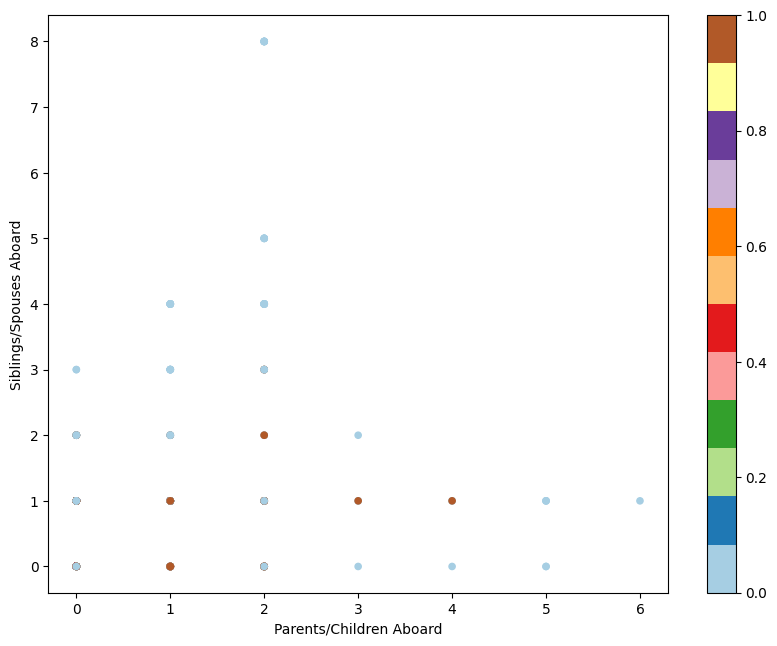

In [20]:
titanic_df.plot.scatter(x="Parents/Children Aboard", y="Siblings/Spouses Aboard", c=clusters, cmap="Paired", figsize=(10, 7.5))